Запрос " ios "


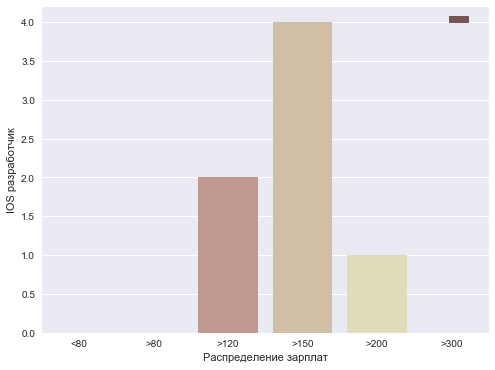

медианное значение :  175000.0
Запрос " android "


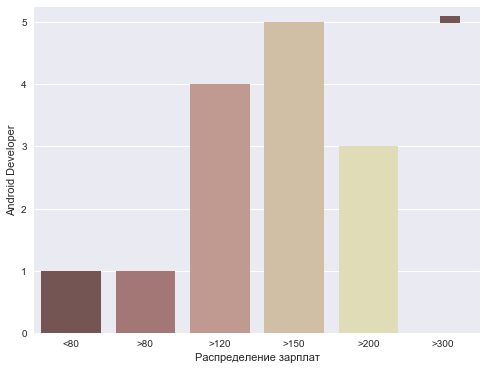

медианное значение :  130000
Запрос " python "


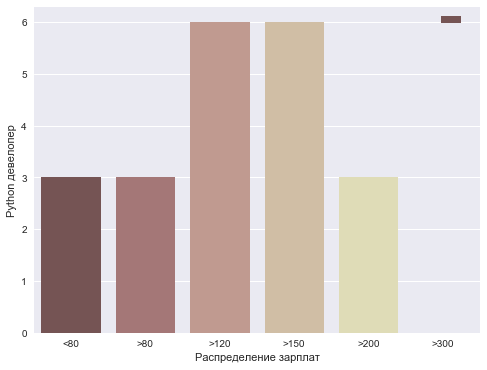

медианное значение :  100000.0
Запрос " data scientist "


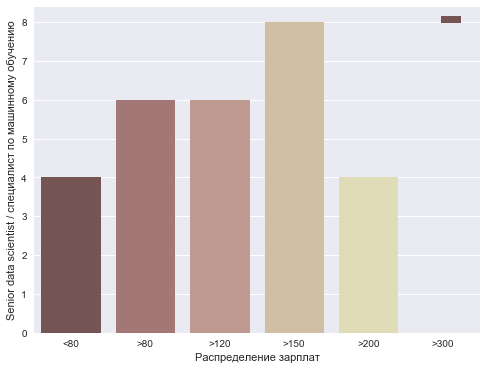

медианное значение :  105000.0
Запрос " machine learning "


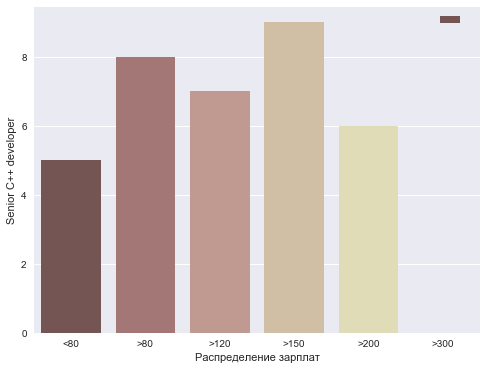

медианное значение :  130000


In [21]:
import requests
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

class Vacancy:
    
    def set(name, employer, area, salary):
        self.name = name
        self.employer = employer
        self.area = area
        self.salary = salary


def find_median(l):
    l.sort()
    if (len(l) % 2 == 1):
        return l[(len(l) // 2)]
    else:
        tmp = ((len(l) // 2) - 1 + (len(l) // 2)) / 2
        return tmp
# arr_global = [0,0,0,0,0,0]

baseURL = 'https://api.hh.ru/'
params = ['ios', 'android', 'python', 'data scientist', 'machine learning']
perPage = '7'
amount = 5
median = -1
listing = []
d = dict()
arr_global = dict()
arr_global['<80'] = 0
arr_global['>80'] = 0
arr_global['>120'] = 0
arr_global['>150'] = 0
arr_global['>200'] = 0
arr_global['>300'] = 0
for i in range (0, amount):
    print('Запрос "', params[i], '"')
    page = requests.get(baseURL + 'vacancies?per_page=' + perPage + '&text=' + params[i] + 
                        '&only_with_salary=true&pages=10&period=30&currency=RUR')
    json = page.json()
    for j in range (0, int(perPage)):
        
        tmp = json['items'][j]['salary']['to']
        if (tmp == None):
            salary = json['items'][j]['salary']['from']
            listing.append(salary)
        else:
            salary = (json['items'][j]['salary']['from'] + json['items'][j]['salary']['to']) / 2
            listing.append(salary)
         
        if (salary < 80000):
            arr_global['<80'] = arr_global['<80'] + 1
        if ((salary >= 80000) & (salary < 120000)):
            arr_global['>80'] = arr_global['>80'] + 1
        if ((salary >= 120000) & (salary < 150000)):
            arr_global['>120'] = arr_global['>120'] + 1
        if ((salary >= 150000) & (salary < 200000)):
            arr_global['>150'] = arr_global['>150'] + 1
        if ((salary >= 200000) & (salary < 300000)):
            arr_global['>200'] = arr_global['>200'] + 1
        if (salary >= 300000):
            arr_global['>300'] = arr_global['>300'] + 1
    
    f, ax = plt.subplots(figsize = (8, 6))
    sns.barplot(list(arr_global.keys()), list(arr_global.values()), palette = 'pink', label = ' ')
    ax.set_ylabel(json['items'][i]['name'])
    ax.set_xlabel("Распределение зарплат")
    ax.legend()
    plt.show()        
    name = json['items'][i]['name']
    median = find_median(listing)
    d[name] = median
    print('медианное значение : ', d[name])
    listing.clear()




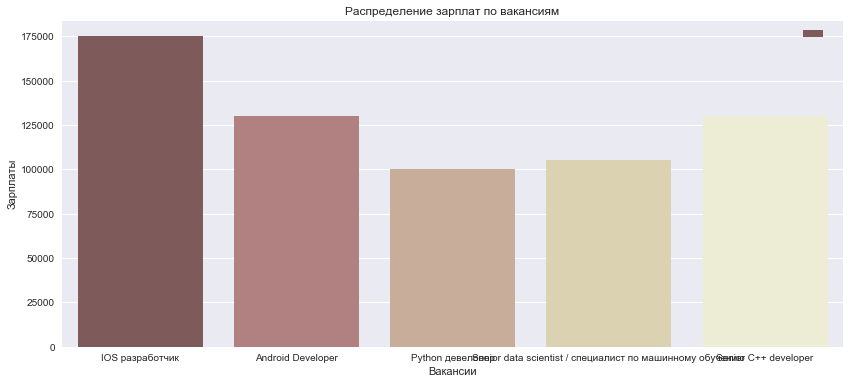

In [20]:

f, ax = plt.subplots(figsize = (14, 6))
sns.barplot(list(d.keys()), list(d.values()), palette='pink', label = ' ')
ax.set_title('Распределение зарплат по вакансиям')
ax.set_xlabel("Вакансии")
ax.set_ylabel("Зарплаты")
ax.legend()
plt.show()
